### Image Classification using CNN

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
%matplotlib inline

In [2]:
(X_train , Y_train), (X_test , Y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
Y_train.shape 

(60000,)

In [5]:
len(X_train)

60000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 640x480 with 0 Axes>

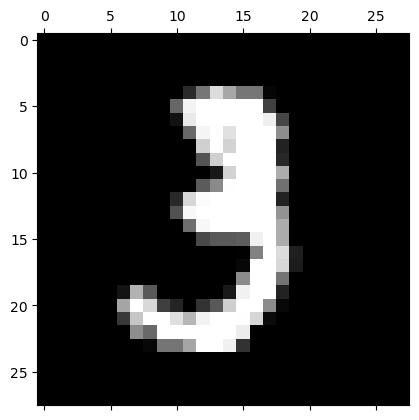

In [7]:
plt.gray()
plt.matshow(X_train[10])

In [8]:
Y_train[0]

5

In [9]:
X_train = X_train /255
X_test = X_test /255

In [10]:
X_train_flatten = X_train.reshape(len(X_train) , 28*28)
X_test_flatten = X_test.reshape(len(X_test) , 28*28)

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
X_train_flatten[0]#one dimention 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# simple neural network 

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) ,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.fit(X_train_flatten ,Y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4684 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2837 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2672 - accuracy: 0.9258


In [14]:
model.evaluate(X_test_flatten ,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9250


[0.26958394050598145, 0.925000011920929]

In [15]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [16]:
y_predicted[6]

array([7.7772356e-04, 6.6485845e-05, 1.4827499e-04, 3.2488286e-02,
       9.9423510e-01, 5.0379002e-01, 6.6659693e-03, 1.7826910e-01,
       7.7007365e-01, 7.4836391e-01], dtype=float32)

(<matplotlib.image.AxesImage at 0x20cd27e1df0>,
 <matplotlib.image.AxesImage at 0x20cd2845130>)

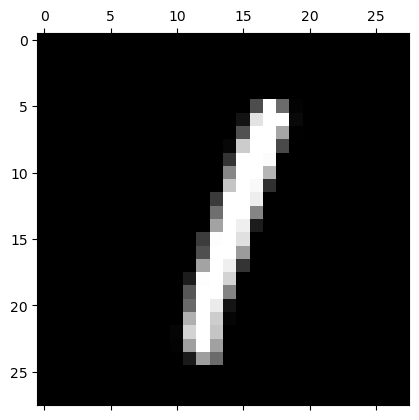

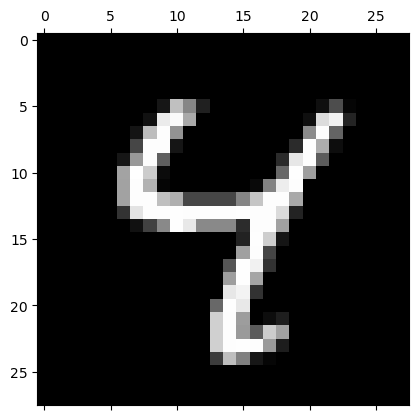

In [17]:
plt.matshow(X_test[5]),plt.matshow(X_test[6])

In [18]:
np.argmax(y_predicted[5]),np.argmax(y_predicted[6])

(1, 4)

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [21]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,   10,  924,   16,    8,    4,   11,   10,   36,    5],
       [   5,    0,   18,  913,    0,   29,    2,   11,   23,    9],
       [   2,    2,    4,    1,  895,    0,   11,    4,    9,   54],
       [  11,    3,    3,   24,    6,  788,   14,    5,   30,    8],
       [  15,    3,    6,    2,    7,   16,  905,    2,    2,    0],
       [   2,   12,   23,    6,    3,    0,    0,  941,    2,   39],
       [  10,   15,    6,   17,    9,   28,    8,   11,  861,    9],
       [  11,    7,    1,    7,   13,    6,    0,   18,    7,  939]])>

Text(95.72222222222221, 0.5, 'Truth')

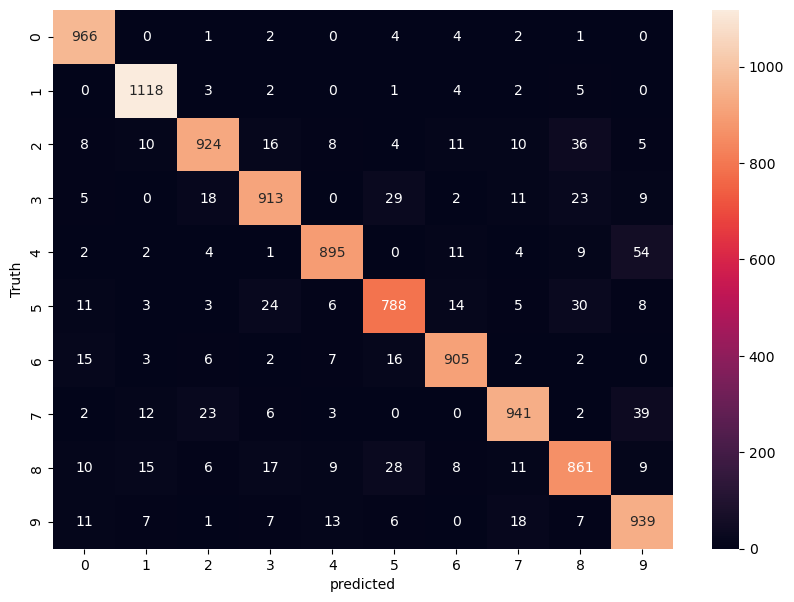

In [22]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot = True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

### using hidden layers

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,) , activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flatten ,Y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0839 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0514 - accuracy: 0.9843


In [24]:
model.evaluate(X_test_flatten ,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9751


[0.08258635550737381, 0.9750999808311462]

313/313 [==============================] - 0s 1ms/step


Text(58.222222222222214, 0.5, 'truth')

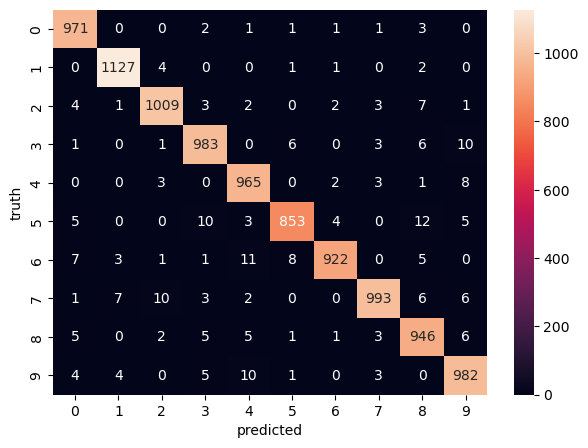

In [25]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=Y_test,predictions =y_predicted_labels)

plt.figure(figsize = (7,5))
sns.heatmap(cm ,annot = True , fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2707 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [27]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9769


[0.08003725111484528, 0.9768999814987183]

## using CNN 

In [31]:
from tensorflow.keras import datasets, layers, models

In [40]:
model= keras.Sequential([
    #cnn
    layers.Conv2D(filters=32 , kernel_size=(3,3), activation = 'relu' ,input_shape= (28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64 , kernel_size=(3,3), activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    #dense
    
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(10 , activation = 'softmax')
    
])

In [41]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [42]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1479 - accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0479 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0186 - accuracy: 0.9942


In [45]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0385 - accuracy: 0.9884


[0.0384962223470211, 0.9883999824523926]